# First draft for publication "money plots"

last edit Sep-29, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

Welcome to JupyROOT 6.26/06
Loaded bin migration and acceptance weights from MC calculations.


In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
results_path = '/Users/erezcohen/Desktop/data/BAND/Results/' + 'Results_10June2023/'
figures_path = '/Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/'

# Auxiliary functions

In [19]:
Previous_SIDIS_path = '/Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/Previous_SIDIS_studies/'
# PhysRevC.85.015202 table 11
JLAB2012_data = pd.read_csv(Previous_SIDIS_path + 'JLAB2012/JLAB2012_r_Table11.csv',
                            names=['z','r [after rho correction]','dr [after rho correction]',                                                                                        
                                   'r [before rho correction]','dr [before rho correction]'],
                            header=0)
JLAB2012_data['Q2'] = 2.3
JLAB2012_data['Q2_min'] = 2.2
JLAB2012_data['Q2_max'] = 2.4


# [B. Hommez, Ph.D. Dissertation, Ghent University (2003), unpublished]
HERMES2000_data = pd.read_csv(Previous_SIDIS_path + 'HERMES2000/HERMES2000.csv',names=['z','r','r_err'], header=0)
HERMES2000_data['Q2'] = 2
HERMES2000_data['Q2_min'] = 1.01
HERMES2000_data['Q2_max'] = 7



Cornell77_xB_024_Q2_20_data = pd.read_csv(Previous_SIDIS_path + 'JLAB2012/Cornell77_xB_0.24_Q2_2.0.csv',names=['z','R'])
# Cornell77 with manual errorbar estimation
Cornell77_xB_024_Q2_20_data['z_err'] = [0.04,0.02]
Cornell77_xB_024_Q2_20_data['R_err'] = [0.1,0.1]
(Cornell77_xB_024_Q2_20_data['r'],Cornell77_xB_024_Q2_20_data['r_err'],_) = get_r_from_CrossSectionRatio(Cornell77_xB_024_Q2_20_data['R'], Cornell77_xB_024_Q2_20_data['R_err'], Cornell77_xB_024_Q2_20_data['R_err'])
Cornell77_xB_024_Q2_20_data['Q2'] = 2.0
Cornell77_xB_024_Q2_20_data['Q2_min'] = 1.9
Cornell77_xB_024_Q2_20_data['Q2_max'] = 2.1

# Cornell77 with manual errorbar estimation
Cornell77_xB_05_Q2_40_data = pd.read_csv(Previous_SIDIS_path + 'JLAB2012/Cornell77_xB_0.5_Q2_4.0.csv',names=['z','R'])
Cornell77_xB_05_Q2_40_data['z_err'] = [0.04,0.02]
Cornell77_xB_05_Q2_40_data['R_err'] = [0.1,0.3]
(Cornell77_xB_05_Q2_40_data['r'],Cornell77_xB_05_Q2_40_data['r_err'],_) = get_r_from_CrossSectionRatio(Cornell77_xB_05_Q2_40_data['R'], Cornell77_xB_05_Q2_40_data['R_err'], Cornell77_xB_05_Q2_40_data['R_err'])
Cornell77_xB_05_Q2_40_data['Q2'] = 4.0
Cornell77_xB_05_Q2_40_data['Q2_min'] = 3.9
Cornell77_xB_05_Q2_40_data['Q2_max'] = 4.1


# JLAB2012_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB2012/JLAB2012.csv',names=['z','R'])
# JLAB2012_data
# # manual errorbar estimation for JLAB2012 data - very tiny except the first point which is roughly 10% uncertainty and last point which has roughly 5% uncertainty
# JLAB2012_data['R_err'] = 0.005*JLAB2012_data['R']
# JLAB2012_data['R_err'][0] = 0.1*JLAB2012_data['R'][0]
# JLAB2012_data['R_err'][17] = 0.05*JLAB2012_data['R'][17]
# (JLAB2012_data['r'],JLAB2012_data['r_err'],_) = get_r_from_CrossSectionRatio(JLAB2012_data['R'], JLAB2012_data['R_err'], JLAB2012_data['R_err'])

In [41]:
def plot_published_r(x0=0.32,z0=0.5, do_JLAB2012=True, do_HERMES2000=True, do_Cornell77=True, do_AfterRhoCorrection=True):
    
    if do_JLAB2012:
        '''
        Hall-C/JLAB-2012 data taken from Table XI of PhysRevC.85.015202
        "z-scan" conditions:
        x=0.32, Q2=2.31, W2=5.7 (W=2.4) and pT ~ 0.05 GeV/c 
        
        "....(i) at a fixed electron kinematics of (x, Q2) = [0.32, 2.30 (GeV/c)2], 
        z was varied from 0.3 to 1 by changing the HMS momentum, 
        with nearly uniform coverage in the pion azimuthal angle,
        φ, around the virtual photon direction, 
        but at a small average Pt of 0.05 GeV/c (z scan)...."
        '''
        label='JLAB 2012, $x=0.32, Q^2=2.3, W=2.4, p_T \sim0.05$'
        if do_AfterRhoCorrection:            
            plt.errorbar( x=JLAB2012_data.z, y=JLAB2012_data['r [after rho correction]'], yerr=JLAB2012_data['dr [after rho correction]'], 
                         markersize=10, capsize=0,capthick=2,
                             marker='s', color=[1,0,0.], markeredgecolor=[0,0,0],linestyle='None', label=label)

        else:
            plt.errorbar( x=JLAB2012_data.z, y=JLAB2012_data['r [before rho correction]'], yerr=JLAB2012_data['dr [before rho correction]'], 
                         markersize=10, capsize=0,capthick=2,
                             marker='s', color=[1,0,0], markeredgecolor=[1,0,0], markerfacecolor=[1,1,1],linestyle='None', label=label)


    if do_HERMES2000:
        plt.errorbar( x=HERMES2000_data.z, y=HERMES2000_data.r, yerr=HERMES2000_data.r_err, 
                 markersize=10, capsize=0,capthick=2,
                 marker='o', color='k', markerfacecolor='forestgreen',
                 linestyle='None', 
                 label='HERMES 2000, $x=0.32, 1<Q^2, 3.3<W$')

    if do_Cornell77:
        plt.errorbar( x=Cornell77_xB_024_Q2_20_data.z, y=Cornell77_xB_024_Q2_20_data.r, 
                     xerr=Cornell77_xB_024_Q2_20_data.z_err, yerr=Cornell77_xB_024_Q2_20_data.r_err, 
                     markersize=15,linestyle='None',
                    marker='^', color='k', markerfacecolor='k',
                    label='Cornell 1977, $x=0.24, Q^2=2.0, W=2.7$')

        plt.errorbar( x=Cornell77_xB_05_Q2_40_data.z, y=Cornell77_xB_05_Q2_40_data.r, 
                     xerr=Cornell77_xB_05_Q2_40_data.z_err, yerr=Cornell77_xB_05_Q2_40_data.r_err, 
                     markersize=15,linestyle='None',
                    marker='^', color='k',markerfacecolor='w',
                    label='Cornell 1977, $x=0.50, Q^2=4.0, W=2.7$')
        
    return


# (1) First plot - bechmark agains previous data

In [42]:
prefix      = 'Untagged_SIDIS_ratio_'
# data_path   = results_path + 'Q2_bins'
# suffixes    = ['_2.0_Q2_2.5']
data_path   = results_path + 'pT_bins_2.0_Q2_2.5'
suffixes    = ['_0.00_pT_0.25']
xB_selected = 0.32
Delta_xB    = 0.02
r_Results   = extract_r_from_SIDIS_ratio(data_path   = data_path,                                                             
                                         prefix      = prefix,
                                         suffixes    = suffixes, 
                                         xB_selected = xB_selected,
                                         Delta_xB    = Delta_xB, 
                                         fdebug      = 0)

[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results

Done loading Untagged_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_10June2023/pT_bins_2.0_Q2_2.5
For ['_0.00_pT_0.25']


## (1.1) option with only JLAB2012 without diffractive $\rho$ correction and no FF prediction

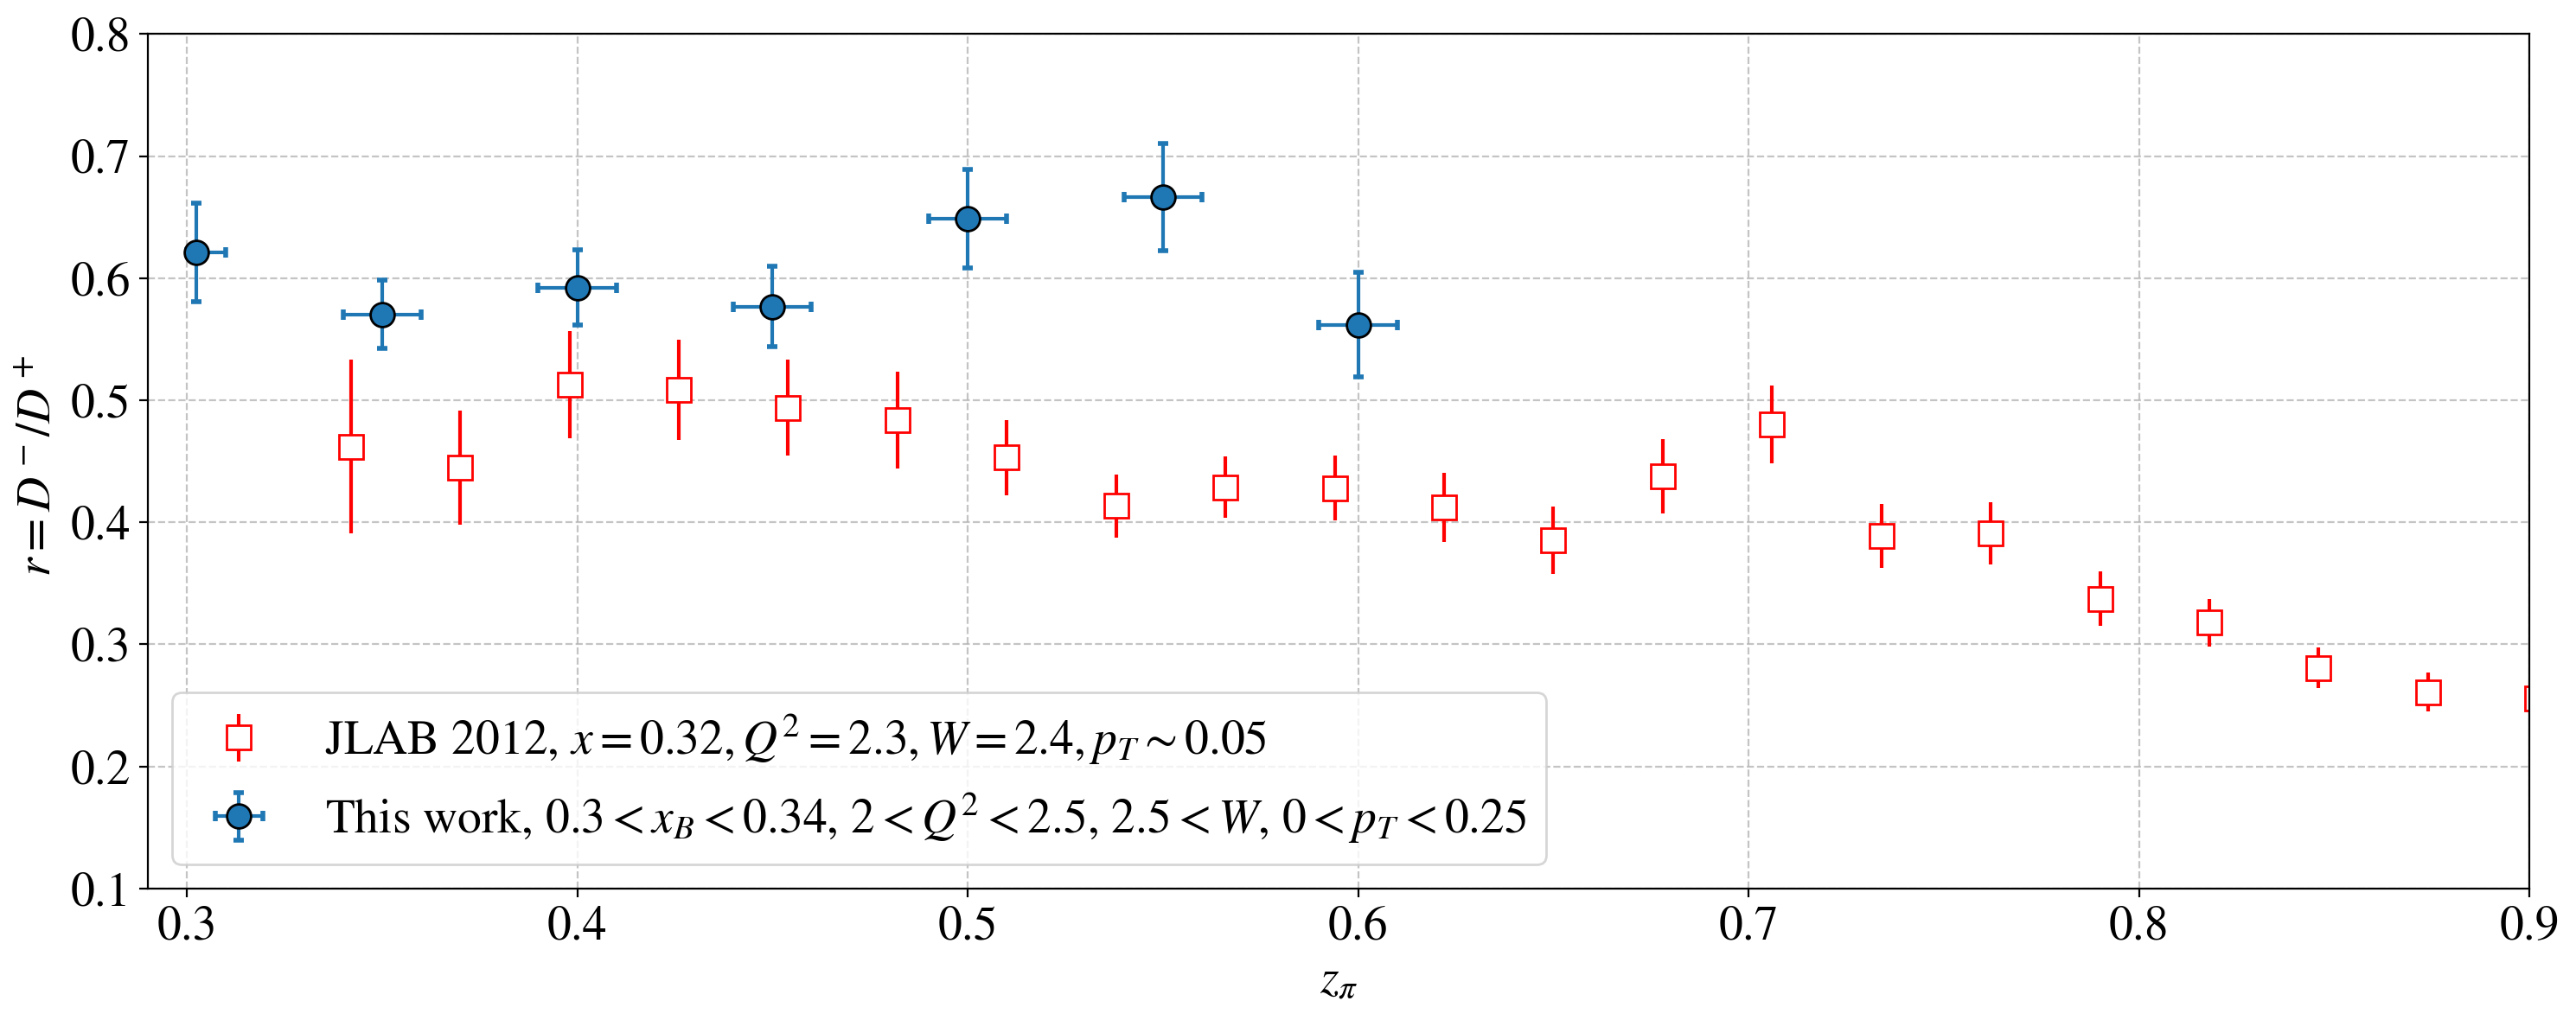

In [47]:
do_add_legend = True;
# do_Cornell77 = True
Q2_min, Q2_max = 2,2.5
fig = plt.figure(figsize=(15,6), tight_layout=True);  ax = fig.add_subplot(1,1,1)
suffix = suffixes[0]
result_label = 'This work, $0.3 < x_B < 0.34$, $2<Q^2<2.5$, $2.5 < W$, $0<p_T<0.25$'
plot_published_r('r', do_JLAB2012=True, do_HERMES2000=False, do_Cornell77=False, do_AfterRhoCorrection=False); 

            
plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                           z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),                           
                           r     = r_corrected_arr[suffix],                           
                           r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,                           
                           label = result_label,                            
                           ax    = ax,                            
                           do_add_fit_to_label=False);
            
set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", do_add_grid=True, do_add_legend=do_add_legend, xlim=(0.29, 0.9), ylim=(0.1,0.8),fontsize=20);
#     save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW'%(xB_selected, Delta_xB,Q2min,Q2max) + '_with_legend.pdf' )

## (1.1) option with JLAB2012 with diffractive $\rho$ correction, HERMES, and Cornell1977 and FF

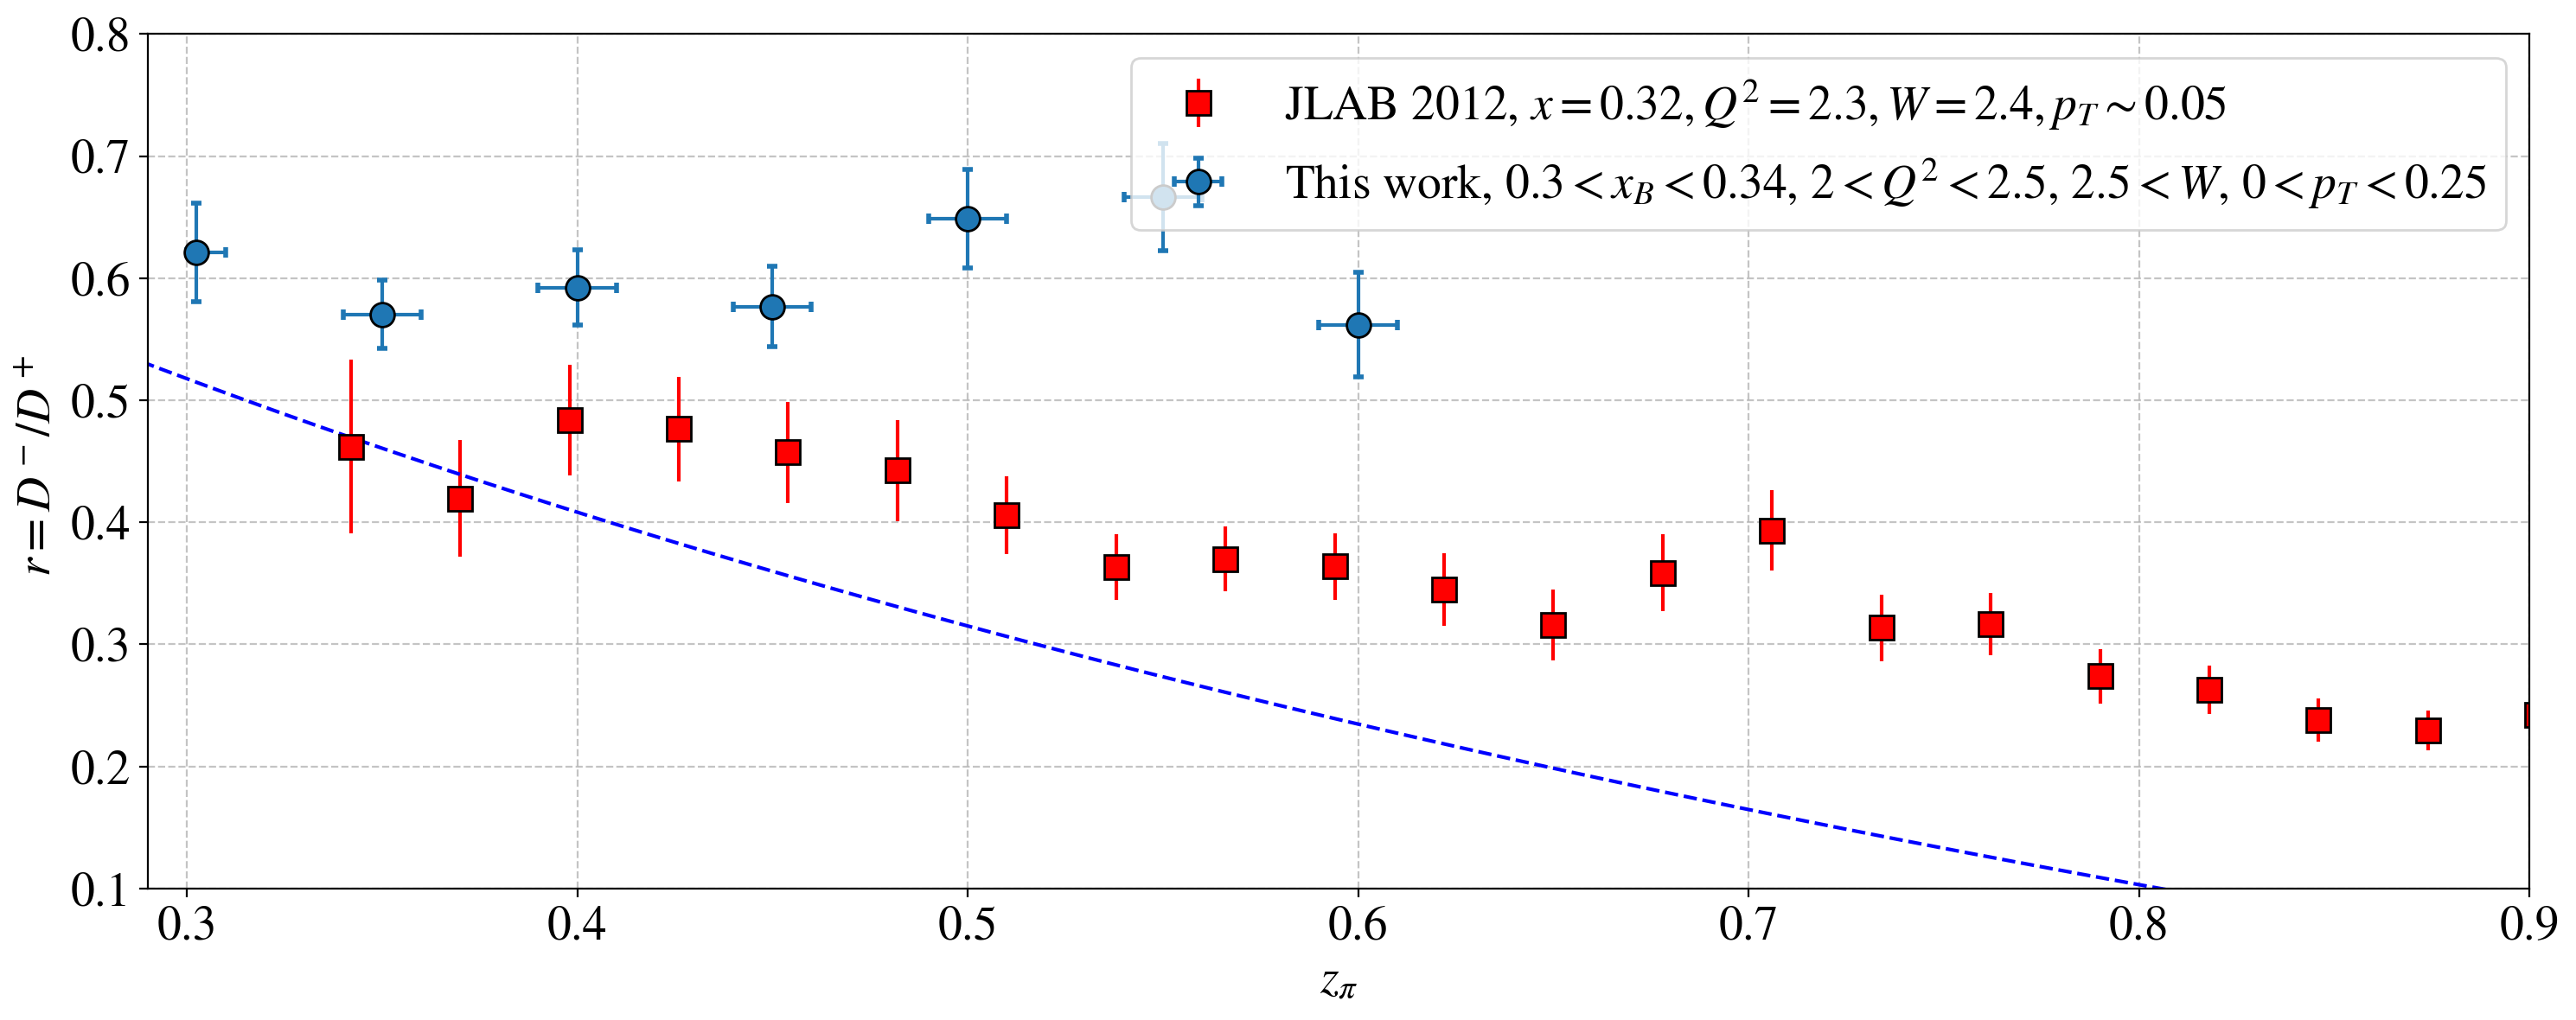

In [48]:
do_add_legend = True;
# do_Cornell77 = True

fig = plt.figure(figsize=(15,6), tight_layout=True);  ax = fig.add_subplot(1,1,1)
plot_published_r('r', do_Cornell77=False, do_HERMES2000=False); 
plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')


            
plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                           z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),                           
                           r     = r_corrected_arr[suffix],                           
                           r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,                           
                           label = result_label,                            
                           ax    = ax,                            
                           do_add_fit_to_label=False);
            
set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", do_add_grid=True, do_add_legend=do_add_legend, xlim=(0.29, 0.9), ylim=(0.1,0.8),fontsize=20);

